In [1]:
import pandas as pd

In [12]:
file_name = 'breast-cancer-wisconsin.txt'
bcw = pd.read_csv(file_name)
print(bcw.head(20))
bcw.describe()

    Index       ID  Clump Thickness Uniformity of Cell Size  \
0       0  1241035                7                       8   
1       1  1107684                6                      10   
2       2   691628                8                       6   
3       3  1226612                7                       5   
4       4  1142706                5                      10   
5       5   601265               10                       4   
6       6   378275               10                       9   
7       7  1142706                5                      10   
8       8   601265               10                       4   
9       9  1226612                7                       5   
10     10  1169049                7                       3   
11     11   691628                8                       6   
12     12  1111249               10                       6   
13     13  1076352                3                       6   
14     14  1112209                8                    

,Index,ID,Clump Thickness
count,15855.000000,1.585500e+04,15855.000000
mean,7927.000000,1.125972e+06,8.263198
std,4577.088594,9.957879e+05,7.393603
min,0.000000,6.163400e+04,1.000000
25%,3963.500000,1.076352e+06,7.000000
50%,7927.000000,1.111249e+06,8.000000
75%,11890.500000,1.198641e+06,10.000000
max,15854.000000,1.345435e+07,100.000000


In [37]:

def filterNoIdea(data):
    data = data.query('Class!="No Idea"')
    return data

def convertInt(data, features):
    for var in features:
        data[var] = [setInt(val) for val in data[var]]
    return data

def setInt(val):
    try:
        return int(val)
    except ValueError:
        return 0

bcw = filterNoIdea(bcw)
bcw = convertInt(bcw, features)
bcw.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4.0
1,1,1107684,6,10,5,5,4,10,6,10,1,4.0
2,2,691628,8,6,4,10,10,1,3,5,1,4.0
3,3,1226612,7,5,6,3,3,8,7,4,1,4.0
4,4,1142706,5,10,10,10,6,10,6,5,2,4.0


In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

features = ['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
label_var = 'Class'
feature_data = bcw[features]
label = bcw[label_var].apply(lambda x: 1 if x==4 else 0)

print(np.mean(label))
feature_data.describe()

def scaleData(data, features):
    scaler = MinMaxScaler()
    scaler.fit(data[features])
    data[features] = scaler.transform(data[features])
    return data

    
scaled_data = scaleData(feature_data, features)
print(scaled_data.head())

0.9564175339009776


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.060606                     0.08                      0.03   
1         0.050505                     0.10                      0.05   
2         0.070707                     0.06                      0.04   
3         0.060606                     0.05                      0.06   
4         0.040404                     0.10                      0.10   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0               0.07                         0.04         0.05   
1               0.05                         0.04         0.10   
2               0.10                         0.10         0.01   
3               0.03                         0.03         0.08   
4               0.10                         0.06         0.10   

   Bland Chromatin  Normal Nucleoli   Mitoses  
0         0.100000             0.08  0.028571  
1         0.085714             0.10  0.014286  
2         0.042857  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


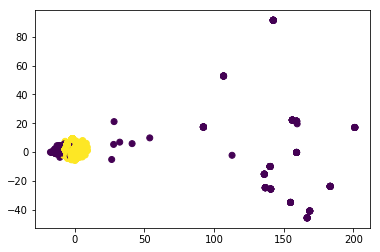

In [60]:

def genPCA(data):
    pca = PCA(n_components=2)
    scaled_pca = pca.fit_transform(data)
    return scaled_pca

def visualizePCA(pca_data, label):
    plt.scatter(x = pca_data[:,0], y = pca_data[:,1], c = label )
    plt.show()

    
scaled_pca = genPCA(scaled_data)
visualizePCA(pca_data, label)



In [66]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(scaled_data, label, test_size = 0.2, stratify = label)

assert len(x_train)==len(y_train)
print('train size equal')
assert len(x_test)==len(y_test)
print('test size equal')
print(np.mean(y_train))
print(np.mean(y_test))

train size equal
test size equal
0.9564017660044151
0.956480605487228


In [89]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score



def trainEvaluateModel(model, x_train, x_test, y_train, y_test):
    res = {}
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    res['precision'] = precision_score(y_test, y_pred)
    res['recall'] = recall_score(y_test, y_pred)
    res['accuracy'] = accuracy_score(y_test, y_pred)
    print(model)
    print(res)
    return y_pred
    
    
    
logistic = LogisticRegression()    
y_pred_log = trainEvaluateModel(logistic, x_train, x_test, y_train, y_test)
svm = SVC()    
y_pred_svm = trainEvaluateModel(svm, x_train, x_test, y_train, y_test)
forest = RandomForestClassifier()  
y_pred_forest = trainEvaluateModel(forest, x_train, x_test, y_train, y_test)
boost = AdaBoostClassifier()  
y_pred_boost = trainEvaluateModel(boost, x_train, x_test, y_train, y_test)




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
{'precision': 0.9631629088599556, 'recall': 1.0, 'accuracy': 0.9634184799747714}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
{'precision': 0.9643879173290938, 'recall': 1.0, 'accuracy': 0.9646799116997793}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
{'precision': 0.999010227647641, 'recall': 0.9983514671941972, 'accuracy': 0.9974771365499843}


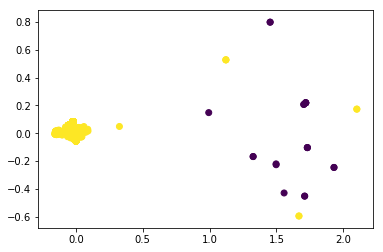

In [97]:
pca_test = genPCA(x_test)

visualizePCA(pca_test, y_pred_log)


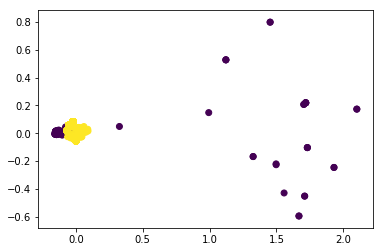

In [94]:
visualizePCA(pca_test, y_test)
